In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from tsshapelet import Shapelet
from dtw import *

## Vector

In [11]:
df = pd.read_csv("GrantSkippingWalking.csv", skiprows = lambda x: x<=9, index_col=False)

df['vm'] = (df['Accelerometer X']**2 + df['Accelerometer Y']**2 + df['Accelerometer Z']**2)**.5

## Skipping

<AxesSubplot: >

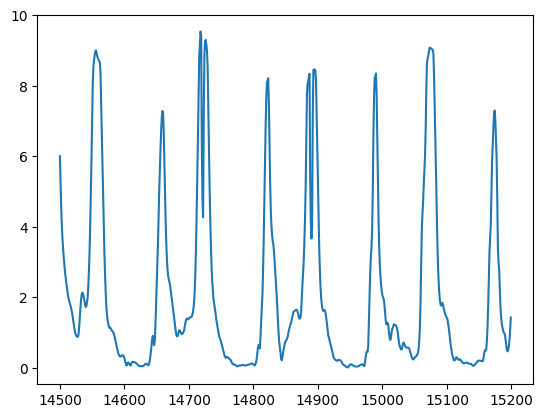

In [12]:
df['vm'][14500:15200].plot()

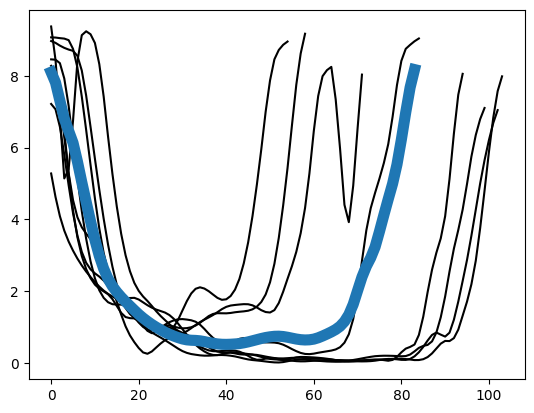

In [13]:
skip_data = df['vm'][14500:15200]
skip_shape = Shapelet(skip_data)
skip_shape.series = skip_shape.original
skip_shape.smooth(3)
skip_shape.candidate_extraction(extraction='peak', min_dist=15, thres=0.8, max_dist=120)
skip_shape.shapelet_selection(barycenter='interpolated')
for arr in skip_shape.candidates:
    plt.plot(arr, color = 'black')
s_rs = skip_shape.shapelets[0]
plt.plot(s_rs, lw=8)

## Walking

<AxesSubplot: >

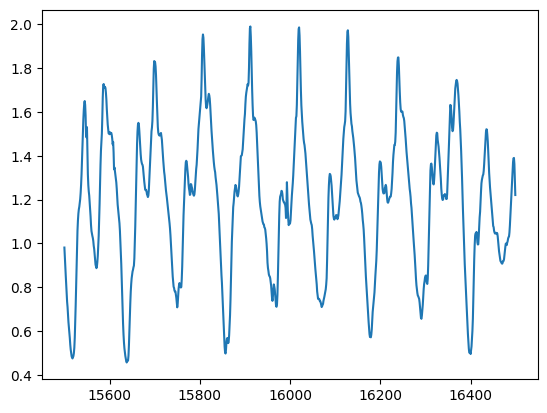

In [14]:
df['vm'][15500:16500].plot()

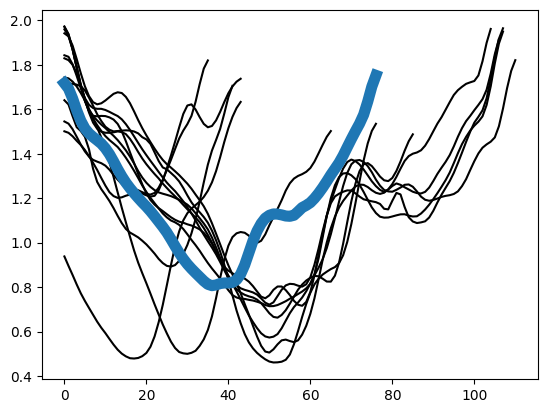

In [15]:
walk_data = df['vm'][15500:16500]
walk_shape = Shapelet(walk_data)
walk_shape.series = walk_shape.original
walk_shape.smooth(3)
walk_shape.candidate_extraction(extraction='peak', min_dist=15, thres=0.8, max_dist=120)
walk_shape.shapelet_selection(barycenter='interpolated')
for arr in walk_shape.candidates:
    plt.plot(arr, color = 'black')
w_rs = walk_shape.shapelets[0]
plt.plot(w_rs, lw=8)

## Waliking and Skipping

<AxesSubplot: >

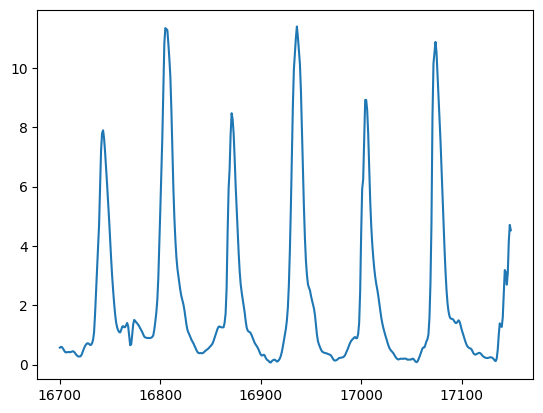

In [16]:
df['vm'][16700:17150].plot()

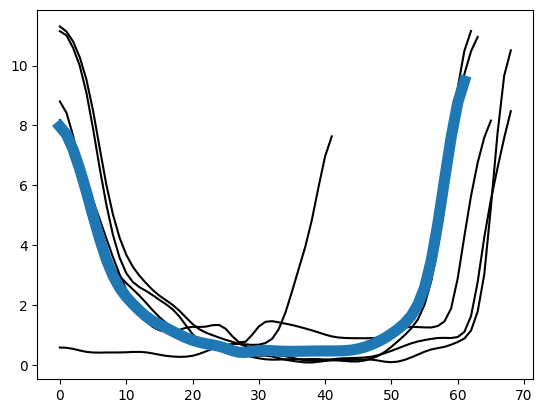

In [17]:
ws_data = df['vm'][16700:17150]
ws_shape = Shapelet(ws_data)
ws_shape.series = ws_shape.original
ws_shape.smooth(3)
ws_shape.candidate_extraction(extraction='peak', min_dist=15, thres=0.8, max_dist=120)
ws_shape.shapelet_selection(barycenter='interpolated')
for arr in ws_shape.candidates:
    plt.plot(arr, color = 'black')
ws_rs = ws_shape.shapelets[0]
plt.plot(ws_rs, lw=8)

# Average the candidates

In [70]:
def dfw_shapelets(shapelet1, shapelet2):
    alignment = dtw(shapelet1, shapelet2, keep_internals=True)
    print(alignment)
    alignment.plot(type="twoway")

def average_shapelets(shapelet1, shapelet2):
    alignment = dtw(shapelet1, shapelet2, keep_internals=True)
    reference = alignment.reference
    query = alignment.query
    average = []
    for index2 in alignment.index2:
        average.append((query[alignment.index1] + reference[alignment.index2]) / 2)
    # print(average)
    plt.plot(alignment.index2,(query[alignment.index1] + reference[alignment.index2]) / 2)
    return average
    # # unwarped
    # plt.plot(reference)
    # plt.plot(query)
    # plt.plot(alignment.index1,reference[alignment.index2])
    # plt.plot(alignment.index2,query[alignment.index1]) 
    # plt.plot(alignment.index2,reference[alignment.index2])   

#### Shapelet[0]

DTW alignment object of size (query x reference): 77 x 84
[array([4.90880101, 4.76479594, 4.51152803, 4.2635703 , 4.09147571,
       3.92494099, 3.66595824, 3.37727924, 3.10256703, 2.83265192,
       2.57484785, 2.35204011, 2.17228411, 2.03225464, 1.92859276,
       1.84731342, 1.77732266, 1.71354501, 1.70159541, 1.67928   ,
       1.5930711 , 1.56975091, 1.49343548, 1.48223015, 1.47410847,
       1.46683263, 1.45928095, 1.44884366, 1.37779856, 1.36151137,
       1.34415733, 1.32813076, 1.26238109, 1.25005026, 1.23866241,
       1.22808154, 1.17149474, 1.16201459, 1.15162064, 1.14024443,
       1.08563993, 1.07374516, 1.06092018, 1.0075189 , 0.99180144,
       0.97664365, 0.92780697, 0.91601221, 0.87217444, 0.86276698,
       0.85367717, 0.84461266, 0.80786426, 0.80482936, 0.78019269,
       0.75837877, 0.73943023, 0.72695811, 0.72139234, 0.71889812,
       0.71344104, 0.70278961, 0.68979154, 0.67865655, 0.67011698,
       0.66516319, 0.66392052, 0.66594771, 0.66980224, 0.67500912,
   

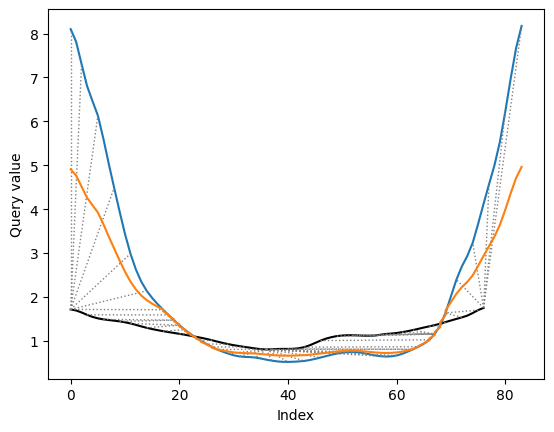

In [71]:
dfw_shapelets(w_rs, s_rs)
average = average_shapelets(w_rs, s_rs)

### Candidate shapelets combination

In [72]:
def pair_candidates(activity1, activity2):
    pairs = []
    for arr1 in activity1.candidates:
        for arr2 in activity2.candidates:
            pair = (arr1, arr2)
            pairs.append(pair)
    return pairs

def plot_avg_pair(activity1, activity2):
    pairs = pair_candidates(activity1, activity2)
    total = len(pairs)
    avg_list = []
    print("There are", total, "combination")
    for tuple in pairs:
        avg_list.append(average_shapelets(tuple[0], tuple[1]))
    return avg_list

There are 96 combination
96


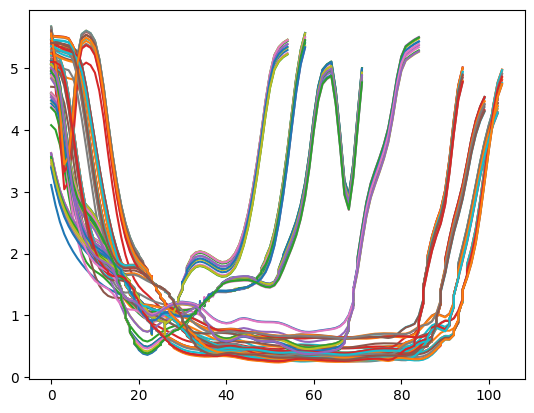

In [74]:
# this is a list store all possible average combination of 2 activities
avg_list = plot_avg_pair(walk_shape, skip_shape)
print(len(avg_list))

In [21]:
from pprint import pprint

# pprint(vars(alignment))


143
